## install package

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
import os

## connet to the shared workspace

**IMPORTANT** go to Google Drive - Shared With Me, right click on the "capstone" folder, and then click "Add shortcut to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/capstone/colab
%pwd

/content/drive/.shortcut-targets-by-id/1xXZ2ldeRl7gFnlMnyoptyZpnfIdhf68X/capstone/colab


'/content/drive/.shortcut-targets-by-id/1xXZ2ldeRl7gFnlMnyoptyZpnfIdhf68X/capstone/colab'

## objects categories


In [ ]:
categories = ["apple",
"backpack",
"banana",
"basketball",
"bed",
"bicycle",
"book",
"bucket",
"cake",
"calendar",
"chair",
"clock",
"couch",
"dog",
"dumbbell",
"eyeglasses",
"fan",
"guitar",
"hat",
"jacket",
"key",
"laptop",
"pants",
"pencil",
"piano",
"pillow",
"rabbit",
"radio",
"saxophone",
"shoe",
"skateboard",
"sock",
"spoon",
"stove",
"strawberry",
"table",
"telephone",
"television",
"toothbrush",
"umbrella",
"vase",
"violin",
"watermelon"]
print(len(categories))

43


## download data

get data from google storage

In [ ]:
#download all the categories
for category in categories:
  download_path = "gs://quickdraw_dataset/full/numpy_bitmap/" + category + ".npy"
  !gsutil -m cp -r $download_path '/content/drive/MyDrive/capstone/colab/quickdraw data'

Copying gs://quickdraw_dataset/full/numpy_bitmap/apple.npy...
\ [1/1 files][108.2 MiB/108.2 MiB] 100% Done                                    
Operation completed over 1 objects/108.2 MiB.                                    
Copying gs://quickdraw_dataset/full/numpy_bitmap/backpack.npy...
\ [1/1 files][ 94.1 MiB/ 94.1 MiB] 100% Done                                    
Operation completed over 1 objects/94.1 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/banana.npy...
==> NOTE: You are downloading one or more large file(s), which would
run significantly faster if you enabled sliced object downloads. This
feature is enabled by default but requires that compiled crcmod be
installed (see "gsutil help crcmod").

/ [1/1 files][230.2 MiB/230.2 MiB] 100% Done                                    
Operation completed over 1 objects/230.2 MiB.                                    
Copying gs://quickdraw_dataset/full/numpy_bitmap/basket.npy...
\ [1/1 files]

## display data

In [3]:
def read_rbg_image(img):
  img_reverse = img.reshape(28, 28)
  print(img_reverse)
  plt.imshow(img_reverse,cmap='gray')

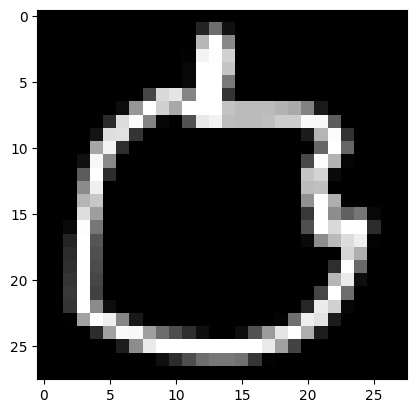

In [10]:
#display example images:
category = "apple"
path = '/content/drive/MyDrive/capstone/colab/quickdraw data/'
file_path = path + category +".npy"
image_data = np.load(file_path)


read_rbg_image(image_data[1])

In [ ]:
def read_image(img):
  img_rgb = img.reshape(28, 28)
  plt.imshow(255-img_rgb,cmap='gray')

<ipython-input-33-36e6e35fe942>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


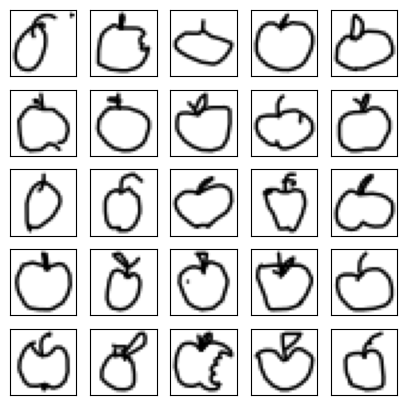

In [ ]:
#display example images:
category = "apple"
path = '/content/drive/MyDrive/capstone/colab/quickdraw data/'
file_path = path + category +".npy"
image_data = np.load(file_path)

plt.subplots(figsize=(5, 5))
for i in range(25):
  plt.subplot(5,5,i+1)
  read_image(image_data[i])
  plt.xticks([])
  plt.yticks([])

## process image

In [ ]:
%cd /content/drive/MyDrive/capstone/colab
%pwd

/content/drive/.shortcut-targets-by-id/1xXZ2ldeRl7gFnlMnyoptyZpnfIdhf68X/capstone/colab


'/content/drive/.shortcut-targets-by-id/1xXZ2ldeRl7gFnlMnyoptyZpnfIdhf68X/capstone/colab'

In [ ]:
def get_file_name(index, category, ext):
  # Specify the number of digits for the file name
  num_digits = 6
  # Generate the file name with leading zeros
  file_name = f"{category}_{index:0{num_digits}}.{ext}"
  return(file_name)

In [ ]:
def save_images_labels(category, category_index):
  # save 70% of 1000 images to the training set
  image_folder_path = os.path.join('data/train/images/', category)
  label_folder_path = os.path.join('data/train/labels/', category)

  for i in range(0,700):
    output_img = 255-image_data[i].reshape(28, 28)
    image = Image.fromarray(output_img)
    if not os.path.exists(image_folder_path):
      os.mkdir(image_folder_path)
    image_name = get_file_name(i+1,category,"png")
    image.save(image_folder_path + "/" + image_name)

    if not os.path.exists(label_folder_path):
      os.mkdir(label_folder_path)
    txt_name = get_file_name(i+1,category,"txt")
    with open(label_folder_path + "/" + txt_name, "w") as out:
      out.write(str(category_index) + " 0.5 0.5 1 1")

  # save 20% of 1000 images to the validation set
  image_folder_path = os.path.join('data/valid/images/', category)
  label_folder_path = os.path.join('data/valid/labels/', category)

  for i in range(700,900):
    output_img = 255-image_data[i].reshape(28, 28)
    image = Image.fromarray(output_img)
    if not os.path.exists(image_folder_path):
      os.mkdir(image_folder_path)
    image_name = get_file_name(i+1,category,"png")
    image.save(image_folder_path + "/" + image_name)

    if not os.path.exists(label_folder_path):
      os.mkdir(label_folder_path)
    txt_name = get_file_name(i+1,category,"txt")
    with open(label_folder_path + "/" + txt_name, "w") as out:
      out.write(str(category_index) + " 0.5 0.5 1 1")

  # save 10% of 1000 images to the test set
  image_folder_path = os.path.join('data/test/images/', category)
  label_folder_path = os.path.join('data/test/labels/', category)

  for i in range(900,1000):
    output_img = 255-image_data[i].reshape(28, 28)
    image = Image.fromarray(output_img)
    if not os.path.exists(image_folder_path):
      os.mkdir(image_folder_path)
    image_name = get_file_name(i+1,category,"png")
    image.save(image_folder_path + "/" + image_name)

    if not os.path.exists(label_folder_path):
      os.mkdir(label_folder_path)
    txt_name = get_file_name(i+1,category,"txt")
    with open(label_folder_path + "/" + txt_name, "w") as out:
      out.write(str(category_index) + " 0.5 0.5 1 1")

In [ ]:
# # convert all categoties to images and crate labels
# for idx in range(28,30):
#   category = categories[idx]
#   print(category)
#   path = '/content/drive/MyDrive/capstone/colab/quickdraw data/'
#   file_path = path + category +".npy"
#   image_data = np.load(file_path)
#   save_images_labels(category, idx)

saxophone
shoe


In [ ]:
#categories check
import os
path = '/content/drive/MyDrive/capstone/colab/data/'
print(len(os.listdir(path+"train/images/")))
print(len(os.listdir(path+"train/labels/")))
print(len(os.listdir(path+"valid/images/")))
print(len(os.listdir(path+"valid/labels/")))
print(len(os.listdir(path+"test/images/")))
print(len(os.listdir(path+"test/labels/")))

43
43
43
43
43
43


In [ ]:
#file check
path = '/content/drive/MyDrive/capstone/colab/data/'
for i in range(len(categories)):
  category = categories[i]
  s1 = len(os.listdir(path+"train/images/"+category+"/"))
  s2 = len(os.listdir(path+"valid/images/"+category+"/"))
  s3 = len(os.listdir(path+"test/images/"+category+"/"))
  s4 = len(os.listdir(path+"train/labels/"+category+"/"))
  s5 = len(os.listdir(path+"valid/labels/"+category+"/"))
  s6 = len(os.listdir(path+"test/labels/"+category+"/"))
  # print(f'{category} images {s1} {s2} {s3} labels {s4} {s5} {s6}')
  print(i,category,s1,s2,s3,s4,s5,s6)

0 apple 700 200 100 700 200 100
1 backpack 700 200 100 700 200 100
2 banana 700 200 100 700 200 100
3 basketball 700 200 100 700 200 100
4 bed 700 200 100 700 200 100
5 bicycle 700 200 100 700 200 100
6 book 700 200 100 700 200 100
7 bucket 700 200 100 700 200 100
8 cake 700 200 100 700 200 100
9 calendar 700 200 100 700 200 100
10 chair 700 200 100 700 200 100
11 clock 700 200 100 700 200 100
12 couch 700 200 100 700 200 100
13 dog 700 200 100 700 200 100
14 dumbbell 700 200 100 700 200 100
15 eyeglasses 700 200 100 700 200 100
16 fan 700 200 100 700 200 100
17 guitar 700 200 100 700 200 100
18 hat 700 200 100 700 200 100
19 jacket 700 200 100 700 200 100
20 key 700 200 100 700 200 100
21 laptop 700 200 100 700 200 100
22 pants 700 200 100 700 200 100
23 pencil 700 200 100 700 200 100
24 piano 700 200 100 700 200 100
25 pillow 700 200 100 700 200 100
26 rabbit 700 200 100 700 200 100
27 radio 700 200 100 700 200 100
28 saxophone 700 200 100 700 200 100
29 shoe 700 200 100 700 200 100


In [ ]:
for index, category in enumerate(categories):
  name = category + "/" + category + "_000001.txt"
  file_path = '/content/drive/MyDrive/capstone/colab/data/train/labels/' + name
  %cat $file_path
  print("")

0 0.5 0.5 1 1
1 0.5 0.5 1 1
2 0.5 0.5 1 1
3 0.5 0.5 1 1
4 0.5 0.5 1 1
5 0.5 0.5 1 1
6 0.5 0.5 1 1
7 0.5 0.5 1 1
8 0.5 0.5 1 1
9 0.5 0.5 1 1
10 0.5 0.5 1 1
11 0.5 0.5 1 1
12 0.5 0.5 1 1
13 0.5 0.5 1 1
14 0.5 0.5 1 1
15 0.5 0.5 1 1
16 0.5 0.5 1 1
17 0.5 0.5 1 1
18 0.5 0.5 1 1
19 0.5 0.5 1 1
20 0.5 0.5 1 1
21 0.5 0.5 1 1
22 0.5 0.5 1 1
23 0.5 0.5 1 1
24 0.5 0.5 1 1
25 0.5 0.5 1 1
26 0.5 0.5 1 1
27 0.5 0.5 1 1
28 0.5 0.5 1 1
29 0.5 0.5 1 1
30 0.5 0.5 1 1
31 0.5 0.5 1 1
32 0.5 0.5 1 1
33 0.5 0.5 1 1
34 0.5 0.5 1 1
35 0.5 0.5 1 1
36 0.5 0.5 1 1
37 0.5 0.5 1 1
38 0.5 0.5 1 1
39 0.5 0.5 1 1
40 0.5 0.5 1 1
41 0.5 0.5 1 1
42 0.5 0.5 1 1
